In [178]:
# Import all the tools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import imblearn

# Import the estimators
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# And the metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [179]:
# Import with Pandas the data from the dataset

df = pd.read_csv("C:/Users/Digibrush/Downloads/CI/train.csv")
df.head(10)


,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
5,5,1,39,1,171,1,19,133.1,1,19,...,0,0,0,0,0.000000,0,13.9,-0.3,0.79,Dropout
6,6,1,44,1,9085,1,39,130.0,1,37,...,0,5,8,5,13.250000,0,12.4,0.5,1.79,Graduate
7,7,1,1,1,9773,1,1,130.0,1,19,...,0,6,6,6,13.666667,0,10.8,1.4,1.74,Graduate
8,8,1,39,1,9003,1,1,133.1,1,19,...,0,6,10,0,0.000000,0,16.2,0.3,-0.92,Dropout
9,9,1,1,6,9500,1,1,135.0,1,37,...,0,7,7,6,12.966667,0,7.6,2.6,0.32,Graduate


In [180]:
# Dimensions of the dataset
df.shape


(76518, 38)

In [181]:
df.size

2907684

In [182]:
# Types of the features
df.dtypes

id                                                  int64
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees u

In [183]:
# Separate the numerical from the categorical features
float_columns = df.select_dtypes(include='float64').columns.tolist()
int_columns = df.select_dtypes(include='int64').columns.tolist()

float_columns, int_columns

(['Previous qualification (grade)',
  'Admission grade',
  'Curricular units 1st sem (grade)',
  'Curricular units 2nd sem (grade)',
  'Unemployment rate',
  'Inflation rate',
  'GDP'],
 ['id',
  'Marital status',
  'Application mode',
  'Application order',
  'Course',
  'Daytime/evening attendance',
  'Previous qualification',
  'Nacionality',
  "Mother's qualification",
  "Father's qualification",
  "Mother's occupation",
  "Father's occupation",
  'Displaced',
  'Educational special needs',
  'Debtor',
  'Tuition fees up to date',
  'Gender',
  'Scholarship holder',
  'Age at enrollment',
  'International',
  'Curricular units 1st sem (credited)',
  'Curricular units 1st sem (enrolled)',
  'Curricular units 1st sem (evaluations)',
  'Curricular units 1st sem (approved)',
  'Curricular units 1st sem (without evaluations)',
  'Curricular units 2nd sem (credited)',
  'Curricular units 2nd sem (enrolled)',
  'Curricular units 2nd sem (evaluations)',
  'Curricular units 2nd sem (approve

C:\Users\Digibrush\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Text(0.5, 1.0, 'Correlation in the train set (Spearman)')

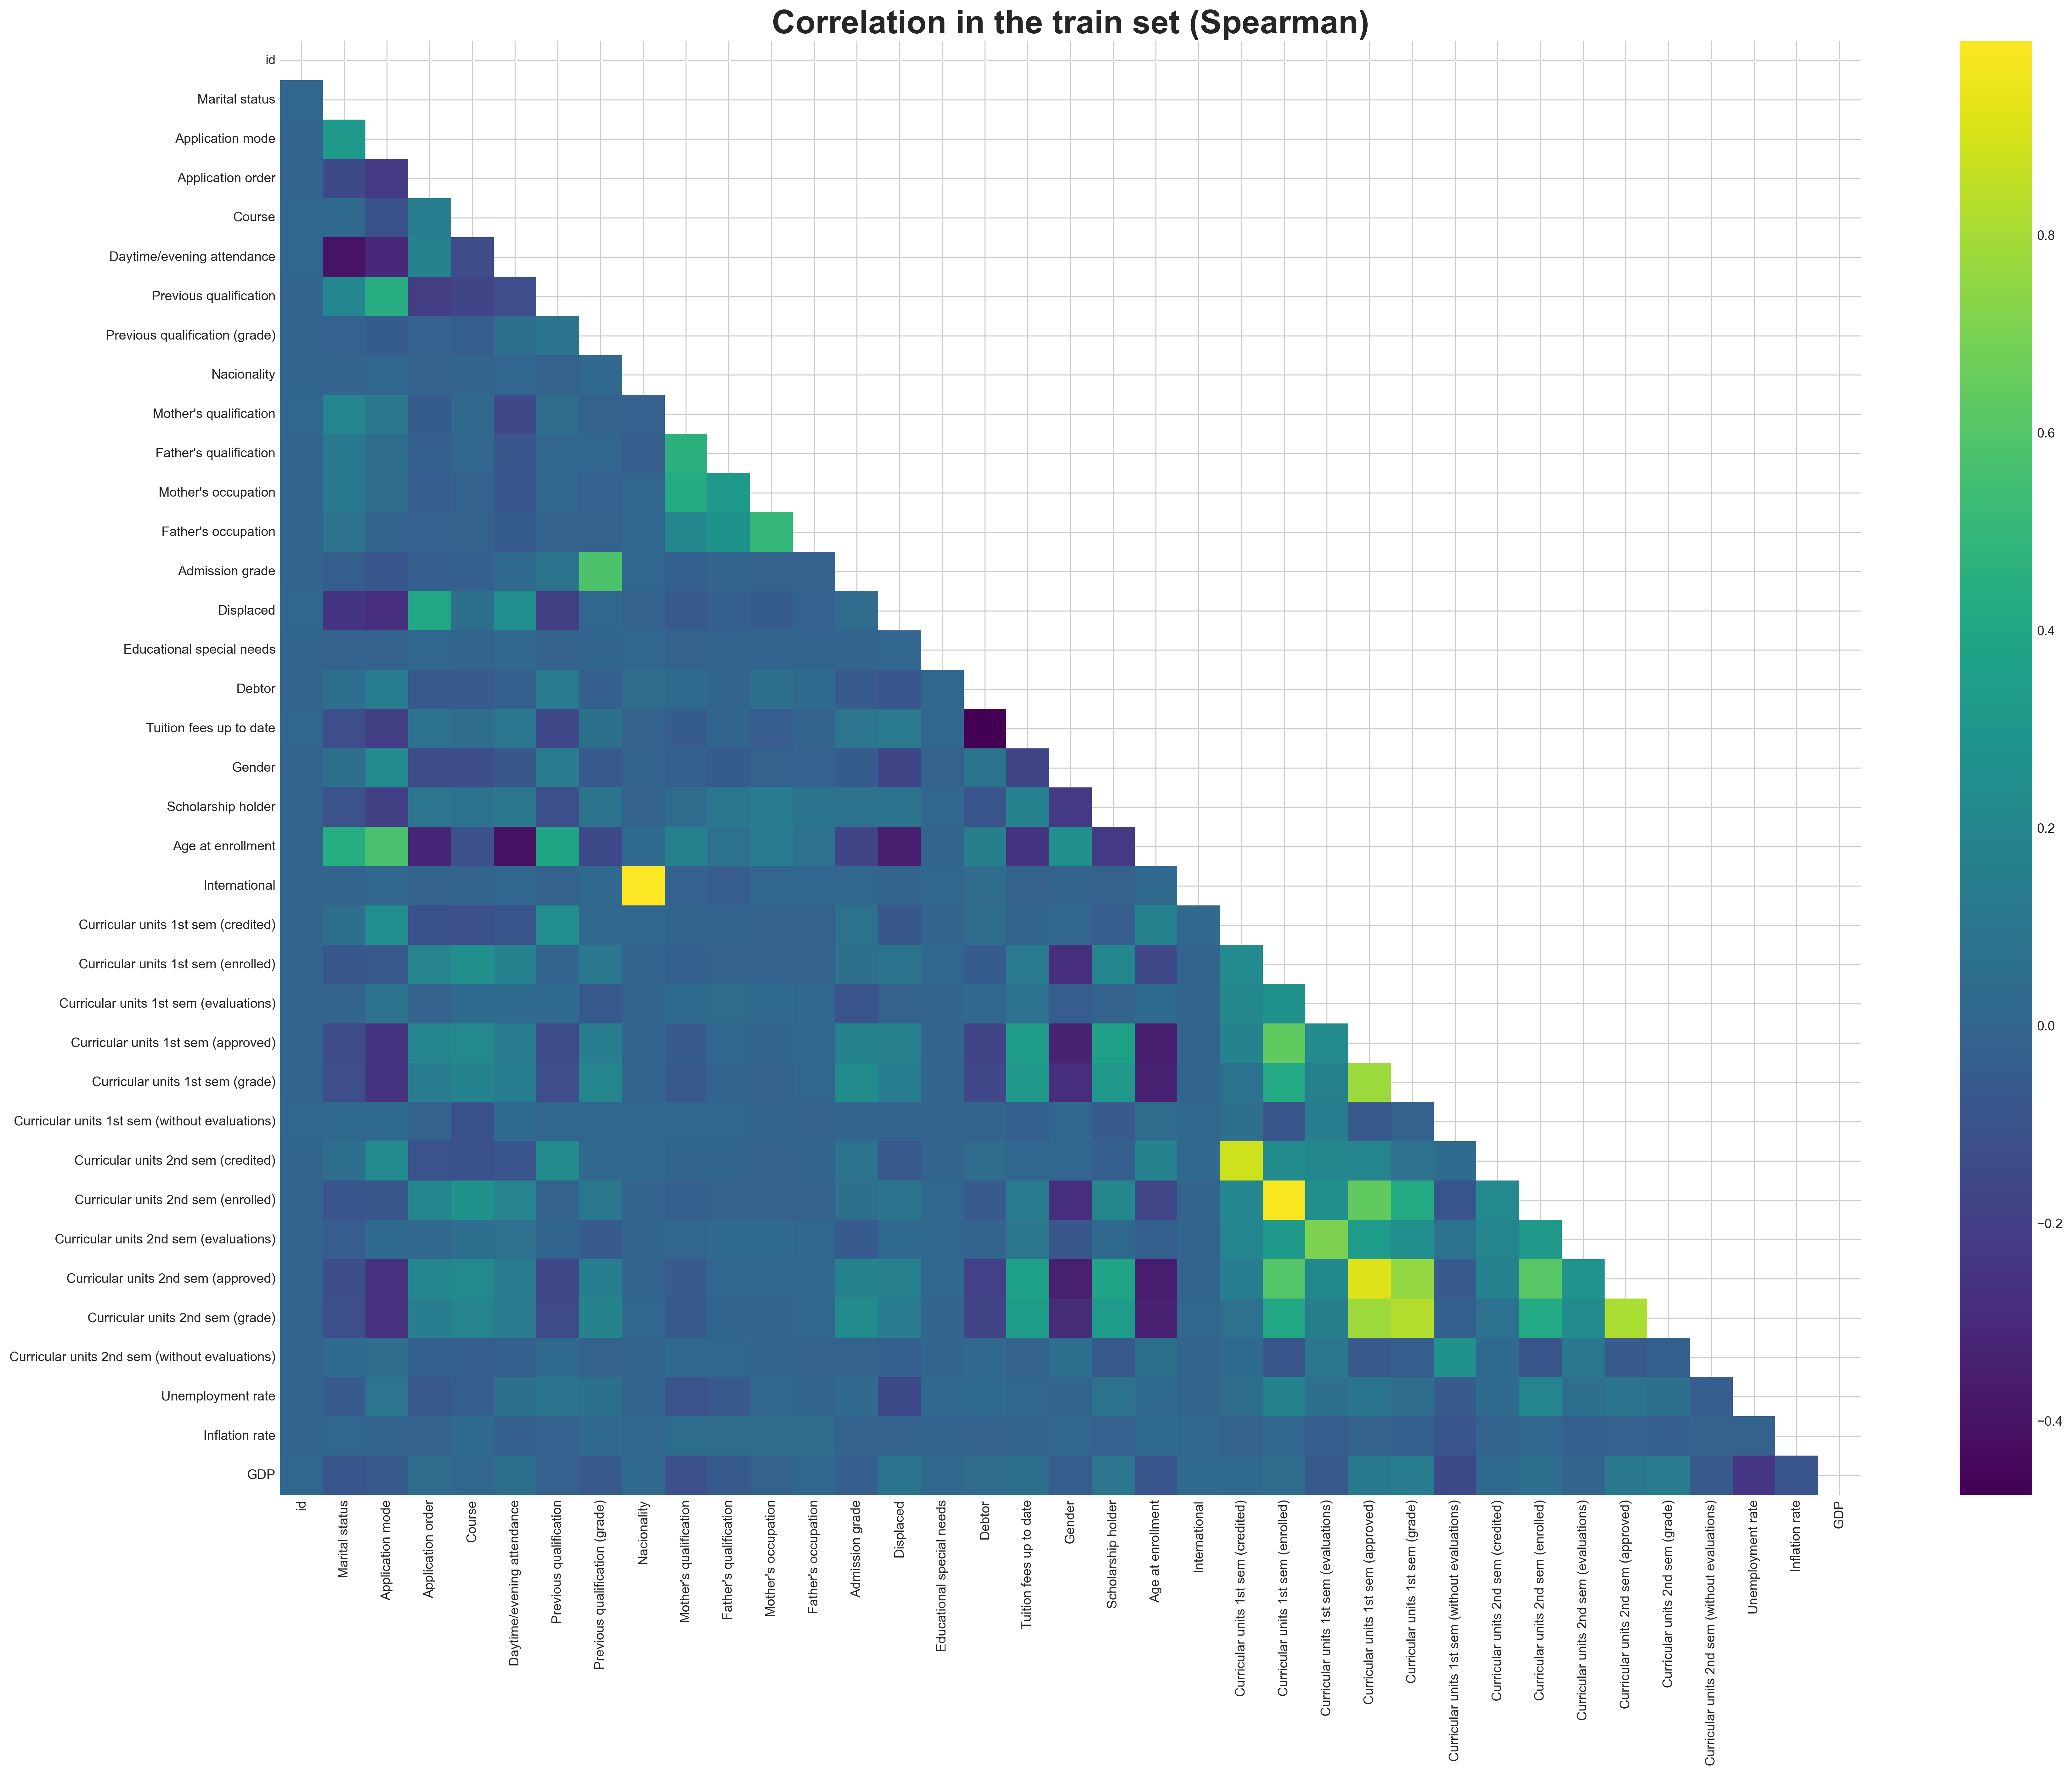

In [184]:
#  Correlation matrix to identify feature influence 

# Drop the target column
# spearman instead of pearson because of the expected non-linear effects
corr = df.drop("Target", axis=1).corr(method='spearman') 

# Cover the up-right side with white cells
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True

# Initialize the plot
fig, ax = plt.subplots(figsize=(27,20), dpi=300)
sns.heatmap(data=corr, 
            mask=mask , 
            annot=True,
            cmap='viridis',
            annot_kws={'size': 10, 'rotation': 45}, 
            ax=ax
            );
ax.set_title(f'Correlation in the train set (Spearman)',fontsize=25, fontweight='bold')

In [185]:
# Finding the features with a high correlation

# Calculate the correlation matrix
corr_matrix = df.drop("Target", axis=1).corr(method='spearman').abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# Find features with correlation greater than 0.95
to_drop1 = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Highly correlated features to drop:", to_drop1)

Highly correlated features to drop: ['International', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)']


Low importance features to drop with an importance lower than 0.5%: ['Marital status', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', 'Educational special needs', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (without evaluations)']


Text(0.5, 1.0, 'Feature Importances')

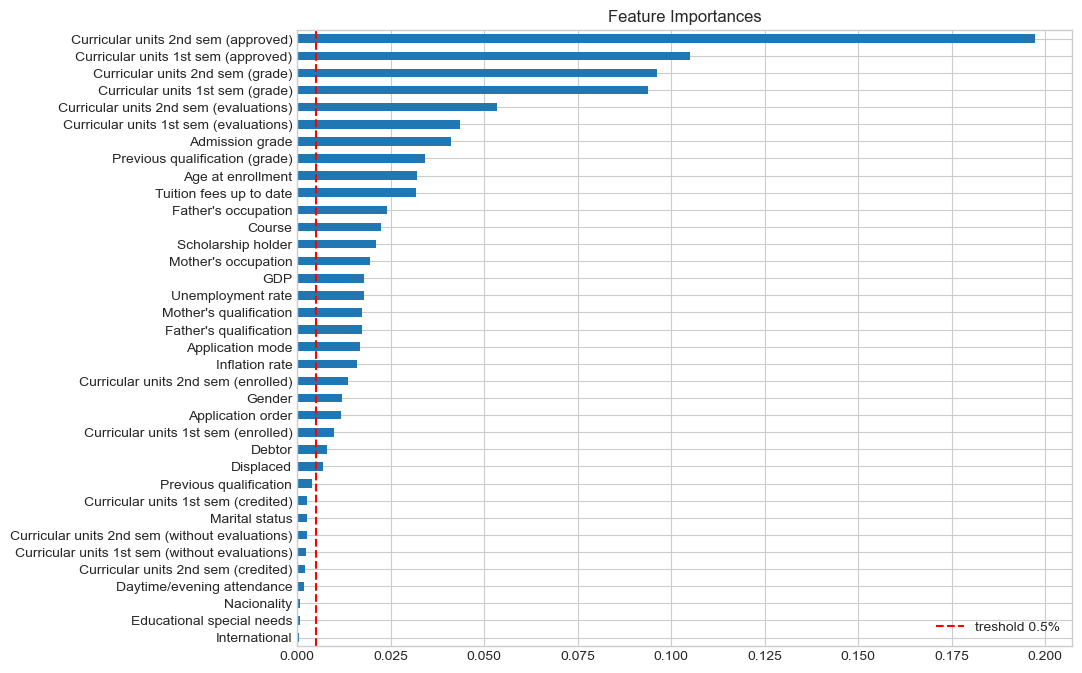

In [186]:
# Create the X and y sets

X = df.drop(["Target", "id"], axis=1)
y = df["Target"]

# Create and fit a RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)

# Create a list with the features importances of all collumns
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns)
# Get features with importance lower than the treshold
treshold = 0.005
to_drop2 = feature_importances[feature_importances < treshold].index.tolist()

print("Low importance features to drop with an importance lower than 0.5%:", to_drop2)

feature_importances.sort_values().plot(kind='barh', figsize=(10, 8))
plt.style.use('seaborn-v0_8-whitegrid')
plt.axvline(x=treshold, color='r', linestyle='--', label=f"treshold {treshold*100}%")
plt.grid(True)
plt.legend()
plt.title('Feature Importances')

Target
Graduate    47.416294
Dropout     33.058888
Enrolled    19.524818
Name: count, dtype: float64


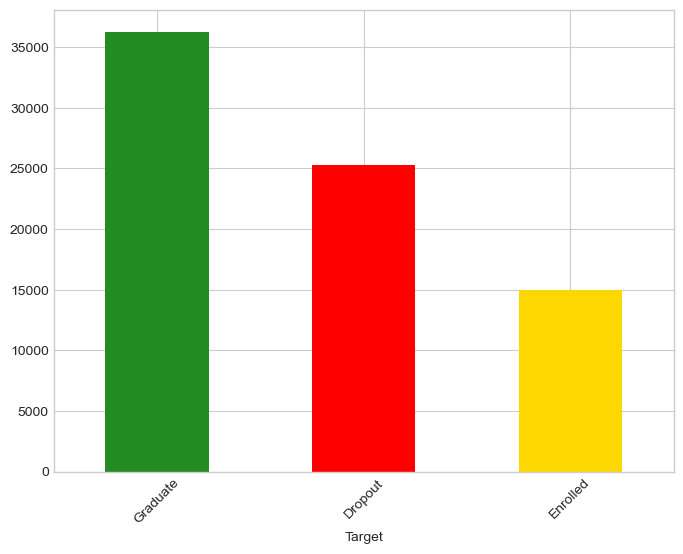

In [187]:
# Print the distributions in percent and then plot them
print(f"{df.Target.value_counts()/df.Target.count()*100}")
ax = df.Target.value_counts().plot(kind="bar", color=["forestgreen", "red", "gold"], figsize=(8, 6))

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Save the plot
plt.savefig("asymmetry_distribution")

In [188]:
df.Target.value_counts().axes

[Index(['Graduate', 'Dropout', 'Enrolled'], dtype='object', name='Target')]

In [189]:
# Create a temporal DataFrame to restore the whole data
df_tmp = df.copy()


In [190]:
# Dropping the features that could confuse the model
for item in to_drop2:
    if item not in to_drop1:
        to_drop1.append(item)
to_drop = to_drop1 + ["id"]
print(f"Features to be dropped: {to_drop}")

Features to be dropped: ['International', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)', 'Marital status', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', 'Educational special needs', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (without evaluations)', 'id']


In [191]:
# Drop the features from the temporal DataFrame
df_tmp = df_tmp.drop(to_drop, axis=1)
df_tmp.shape, df.shape

((76518, 25), (76518, 38))

In [193]:
#first rows
df_tmp.head(10)


,Application mode,Application order,Course,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target
0,1,1,9238,126.0,1,19,5,5,122.6,0,...,6,6,6,14.500000,7,12.428571,11.1,0.6,2.02,Graduate
1,17,1,9238,125.0,19,19,9,9,119.8,1,...,6,8,4,11.600000,9,0.000000,11.1,0.6,2.02,Dropout
2,17,2,9254,137.0,3,19,2,3,144.7,0,...,6,0,0,0.000000,0,0.000000,16.2,0.3,-0.92,Dropout
3,1,3,9500,131.0,19,3,3,2,126.1,1,...,7,9,7,12.591250,11,12.820000,11.1,0.6,2.02,Enrolled
4,1,2,9500,132.0,19,37,4,9,120.1,1,...,7,12,6,12.933333,12,12.933333,7.6,2.6,0.32,Graduate
5,39,1,171,133.1,19,19,1,1,100.0,0,...,0,0,0,0.000000,0,0.000000,13.9,-0.3,0.79,Dropout
6,44,1,9085,130.0,37,37,9,6,130.0,1,...,5,7,4,12.750000,8,13.250000,12.4,0.5,1.79,Graduate
7,1,1,9773,130.0,19,37,4,5,133.9,1,...,6,6,5,13.000000,6,13.666667,10.8,1.4,1.74,Graduate
8,39,1,9003,133.1,19,19,9,9,130.0,1,...,6,8,0,0.000000,10,0.000000,16.2,0.3,-0.92,Dropout
9,1,6,9500,135.0,37,37,4,9,128.0,1,...,7,7,6,12.966667,7,12.966667,7.6,2.6,0.32,Graduate


In [194]:
# Import the metrics
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.combine import SMOTETomek

# Create the X and y sets
X = df_tmp.drop('Target', axis=1)
y = df_tmp['Target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTETomek to balance the training data
smote_tomek = SMOTETomek(random_state=42)
X_res, y_res = smote_tomek.fit_resample(X_train, y_train)

# Train a Random Forest model with class weights
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_res, y_res)

# Predict and evaluate
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4034  688  337]
 [ 287 1953  748]
 [ 128  755 6374]]
              precision    recall  f1-score   support

     Dropout       0.91      0.80      0.85      5059
    Enrolled       0.58      0.65      0.61      2988
    Graduate       0.85      0.88      0.87      7257

    accuracy                           0.81     15304
   macro avg       0.78      0.78      0.78     15304
weighted avg       0.82      0.81      0.81     15304



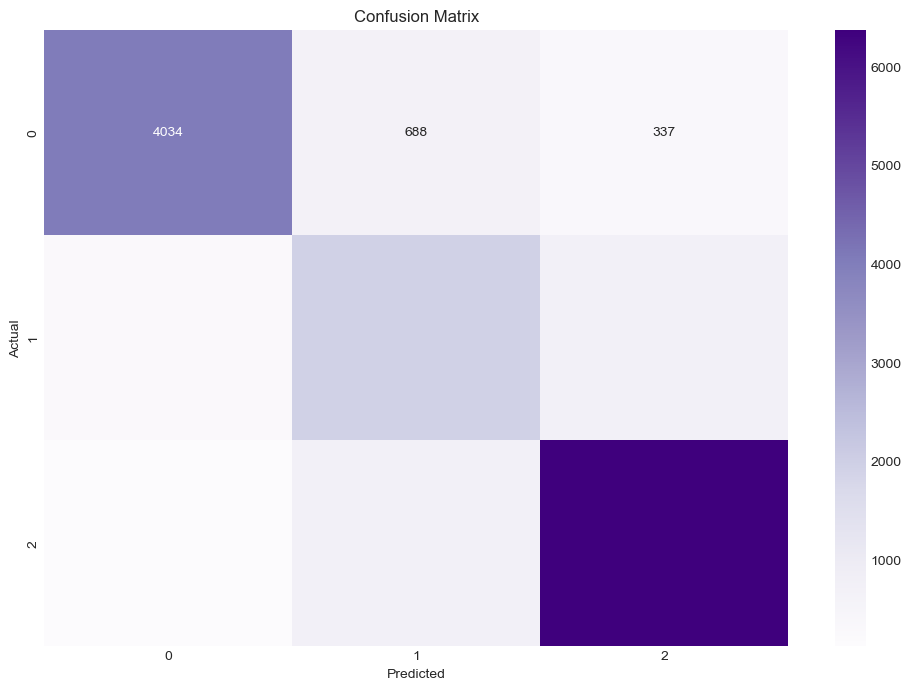

In [195]:
# Create the confusion matrix for the data
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

[[4042  636  381]
 [ 312 1880  796]
 [ 146  676 6435]]
              precision    recall  f1-score   support

     Dropout       0.90      0.80      0.85      5059
    Enrolled       0.59      0.63      0.61      2988
    Graduate       0.85      0.89      0.87      7257

    accuracy                           0.81     15304
   macro avg       0.78      0.77      0.77     15304
weighted avg       0.81      0.81      0.81     15304



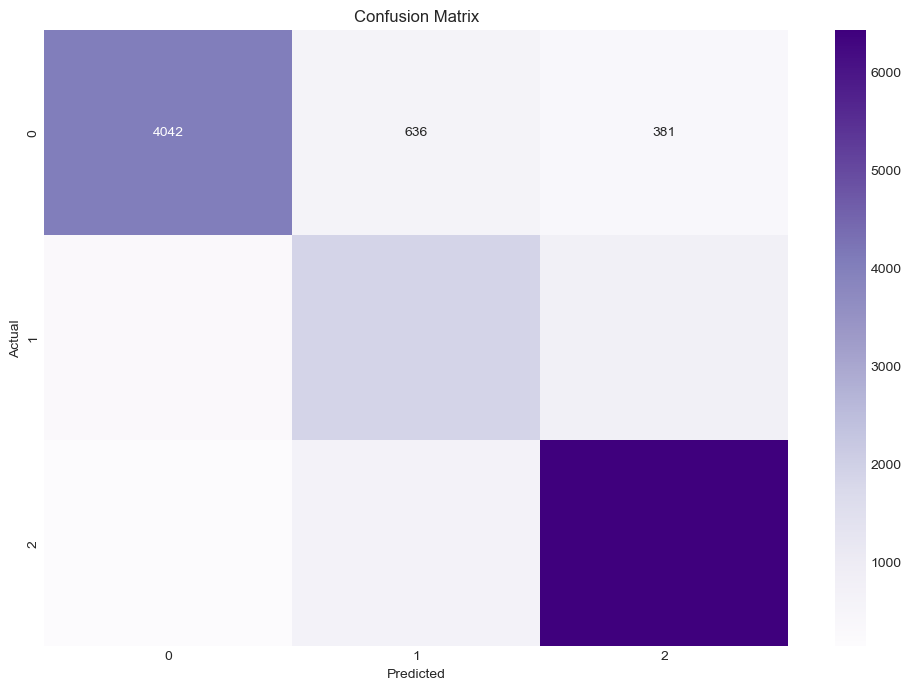

In [196]:
# Train a second Random Forest model with class weights
model2 = RandomForestClassifier(class_weight={'Dropout': 1, 'Enrolled': 3, 'Graduate': 1})
model2.fit(X_res, y_res)

# Predict and evaluate
y_pred2 = model2.predict(X_test)
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

# Create the confusion matrix for the data
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [197]:
# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels
    '''
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    for name, model in models.items():
        # Fit the model to the data
        print(f"Fitting {name}...")
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        print(f"Evaluating {name}...")
        model_scores[name] = model.score(X_test, y_test)
    return model_scores


In [198]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define models and their respective hyperparameter grids
models = {
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(), 
    "Logistic Regression" : LogisticRegression(),
    "CatBoost Classifier" : CatBoostClassifier(),
    'LightGBM': LGBMClassifier()
}

# turn the values in the Target column into integers by mapping the y_res and y_test lists
mapping = {'Dropout' : 0,
           'Enrolled' : 1,
           'Graduate' : 2}
y_res, y_test = y_res.map(mapping), y_test.map(mapping)

model_scores = fit_and_score(models, X_res, X_test, y_res, y_test)
model_scores

Fitting RandomForest...
Evaluating RandomForest...
Fitting XGBoost...
Evaluating XGBoost...
Fitting Logistic Regression...


C:\Users\Digibrush\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluating Logistic Regression...
Fitting CatBoost Classifier...
Learning rate set to 0.099207
0:	learn: 0.9977480	total: 56.5ms	remaining: 56.4s
1:	learn: 0.9211417	total: 99.8ms	remaining: 49.8s
2:	learn: 0.8596574	total: 136ms	remaining: 45.1s
3:	learn: 0.8109256	total: 174ms	remaining: 43.3s
4:	learn: 0.7692371	total: 214ms	remaining: 42.6s
5:	learn: 0.7354666	total: 260ms	remaining: 43.1s
6:	learn: 0.7071719	total: 299ms	remaining: 42.4s
7:	learn: 0.6821459	total: 337ms	remaining: 41.7s
8:	learn: 0.6609749	total: 374ms	remaining: 41.2s
9:	learn: 0.6412344	total: 459ms	remaining: 45.5s
10:	learn: 0.6249479	total: 500ms	remaining: 45s
11:	learn: 0.6104529	total: 537ms	remaining: 44.2s
12:	learn: 0.5977308	total: 579ms	remaining: 43.9s
13:	learn: 0.5863800	total: 615ms	remaining: 43.3s
14:	learn: 0.5768683	total: 650ms	remaining: 42.7s
15:	learn: 0.5682286	total: 696ms	remaining: 42.8s
16:	learn: 0.5604821	total: 734ms	remaining: 42.5s
17:	learn: 0.5530933	total: 777ms	remaining: 42.

{'RandomForest': 0.8090695243073707,
 'XGBoost': 0.8207658128593832,
 'Logistic Regression': 0.6881860951385259,
 'CatBoost Classifier': 0.819916361735494,
 'LightGBM': 0.8157344485101934}

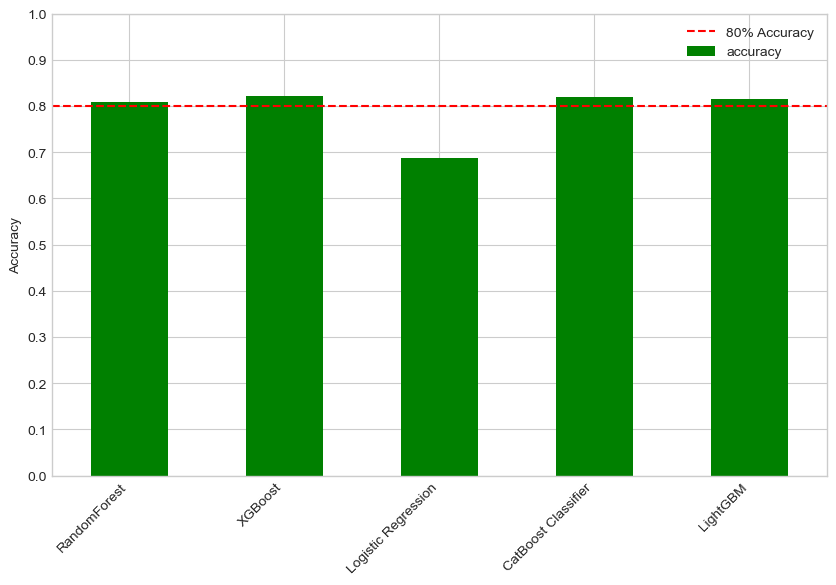

In [199]:
# Turn the dictionary into a DataFrame
model_compare = pd.DataFrame(model_scores, index=["accuracy"])

# Plot the bar chart with conditional colors
ax = model_compare.T.plot(kind='bar', color='green', legend=False, figsize=(10, 6))

# Add labels and title
ax.set_ylabel('Accuracy')
# ax.set_title('Model Comparison')
ax.set_ylim([0,1])
ax.set_yticks(np.arange(0, 1.1, step=0.1))
ax.set_xticklabels(model_compare.columns, rotation=45, ha='right')

# Add a horizontal line for the accuracy limit
ax.axhline(y=0.8, c='r', linestyle='--', label='80% Accuracy')
plt.legend()


# Show the plot
plt.show()


In [200]:
# Select only the models with an accuracy higher than 80%
filtered_models = {model : score for model, score in model_scores.items() if score > 0.80}
filtered_models

{'RandomForest': 0.8090695243073707,
 'XGBoost': 0.8207658128593832,
 'CatBoost Classifier': 0.819916361735494,
 'LightGBM': 0.8157344485101934}

In [201]:
best_models = {
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    "CatBoost Classifier" : CatBoostClassifier(),
    'LightGBM': LGBMClassifier()
}
# Create the X and y sets
X = df_tmp.drop('Target', axis=1)
y = df_tmp['Target']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Set random seed
np.random.seed(42)
y_train, y_test = y_train.map(mapping), y_test.map(mapping)
# Make a dictionary to keep model scores
model_scores1 = {}
for name, model in best_models.items():
    # Fit the model to the data
    print(f"Fitting {name}...")
    model.fit(X_train, y_train)
    # Evaluate the model and append its score to model_scores
    print(f"Evaluating {name}...")
    model_scores1[name] = model.score(X_test, y_test)

Fitting RandomForest...
Evaluating RandomForest...
Fitting XGBoost...
Evaluating XGBoost...
Fitting CatBoost Classifier...
Learning rate set to 0.097601
0:	learn: 1.0001038	total: 30.2ms	remaining: 30.2s
1:	learn: 0.9224932	total: 57.8ms	remaining: 28.9s
2:	learn: 0.8622153	total: 85.1ms	remaining: 28.3s
3:	learn: 0.8136269	total: 112ms	remaining: 28s
4:	learn: 0.7730556	total: 139ms	remaining: 27.7s
5:	learn: 0.7377609	total: 168ms	remaining: 27.9s
6:	learn: 0.7092062	total: 198ms	remaining: 28.1s
7:	learn: 0.6837673	total: 241ms	remaining: 29.9s
8:	learn: 0.6619849	total: 271ms	remaining: 29.8s
9:	learn: 0.6427503	total: 298ms	remaining: 29.5s
10:	learn: 0.6262234	total: 326ms	remaining: 29.3s
11:	learn: 0.6123155	total: 354ms	remaining: 29.1s
12:	learn: 0.5995052	total: 380ms	remaining: 28.9s
13:	learn: 0.5881238	total: 410ms	remaining: 28.9s
14:	learn: 0.5780723	total: 447ms	remaining: 29.4s
15:	learn: 0.5693634	total: 476ms	remaining: 29.3s
16:	learn: 0.5618160	total: 503ms	remain

In [202]:
# Import the RandomizedSearchCV function
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grids for each model
param_grids = {
    'RandomForestClassifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'XGBClassifier': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 9],
        'colsample_bytree': [0.3, 0.7, 1]
    },
     'CatBoostClassifier': {
        'iterations': np.linspace(100, 1000, 10, dtype=int),
        'learning_rate': [0.01, 0.05, 0.1],
        'depth': [4, 6, 8, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9],
        'border_count': [32, 50, 100, 150, 200],
        'bagging_temperature': [0.1, 0.2, 0.5, 0.8, 1],
        'random_strength': [1, 2, 5, 10],
        'leaf_estimation_iterations': [1, 5, 10]
    },
    'LGBMClassifier': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [31, 61, 91],
        'boosting_type': ['gbdt', 'dart']
    }
}

# Create the X and y sets
X = df_tmp.drop('Target', axis=1)
y = df_tmp['Target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

y_train, y_test = y_train.map(mapping), y_test.map(mapping)

# Store the results
best_models = {}
best_scores = {}


# Iterate over the models and their parameter grids
for model_name, params in param_grids.items():
    if model_name == 'RandomForestClassifier':
        model = RandomForestClassifier(random_state=42)
    elif model_name == 'XGBClassifier':
        model = XGBClassifier(random_state=42)
    elif model_name == 'CatBoostClassifier':
        model = CatBoostClassifier(silent=True, random_state=42)
    elif model_name == 'LGBMClassifier':
        model = LGBMClassifier(random_state=42)


    # Setup the randomized search
    random_search = RandomizedSearchCV(estimator=model, param_distributions=params, 
                                       n_iter=25, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)
    
    # Fit the randomized search
    random_search.fit(X_train, y_train)
    
    # Store the best parameters and best score
    best_models[model_name] = random_search.best_params_
    best_scores[model_name] = random_search.best_score_

# Print the best parameters and scores
for model_name in best_models.keys():
    print(f"Best parameters for {model_name}: {best_models[model_name]}")
    print(f"Best score for {model_name}: {best_scores[model_name]}")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1224
[LightGBM] [Info] Number of data points in the train set: 61214, number of used features: 24
[LightGBM] [Info] Start training from score -1.106863
[LightGBM] [Info] Start training from score -1.633477
[LightGBM] [Info] Start training from score -0.746218
Best parameters for RandomForestClassifier: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': None}
Best score for RandomFore

In [203]:
# Take a look at the scores
best_scores

{'RandomForestClassifier': 0.8138824898298163,
 'XGBClassifier': 0.8211030917873738,
 'CatBoostClassifier': 0.8196328318761761,
 'LGBMClassifier': 0.8187833508628298}

In [204]:
# And also of the parameters
best_models

{'RandomForestClassifier': {'n_estimators': 200,
  'min_samples_split': 5,
  'min_samples_leaf': 4,
  'max_depth': None},
 'XGBClassifier': {'n_estimators': 300,
  'max_depth': 3,
  'learning_rate': 0.2,
  'colsample_bytree': 0.7},
 'CatBoostClassifier': {'random_strength': 2,
  'learning_rate': 0.1,
  'leaf_estimation_iterations': 1,
  'l2_leaf_reg': 5,
  'iterations': 400,
  'depth': 6,
  'border_count': 200,
  'bagging_temperature': 0.2},
 'LGBMClassifier': {'num_leaves': 31,
  'n_estimators': 200,
  'learning_rate': 0.2,
  'boosting_type': 'dart'}}

In [205]:
# Calculate the performance difference before and after RandomSearchCV
difference = [a - b for a, b in zip(best_scores.values(), filtered_models.values())]
difference

[0.004812965522445589,
 0.0003372789279906252,
 -0.0002835298593178992,
 0.00304890235263644]

C:\Users\Digibrush\AppData\Local\Temp\ipykernel_7676\4238662670.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(best_scores.keys(), rotation=45, ha='right')


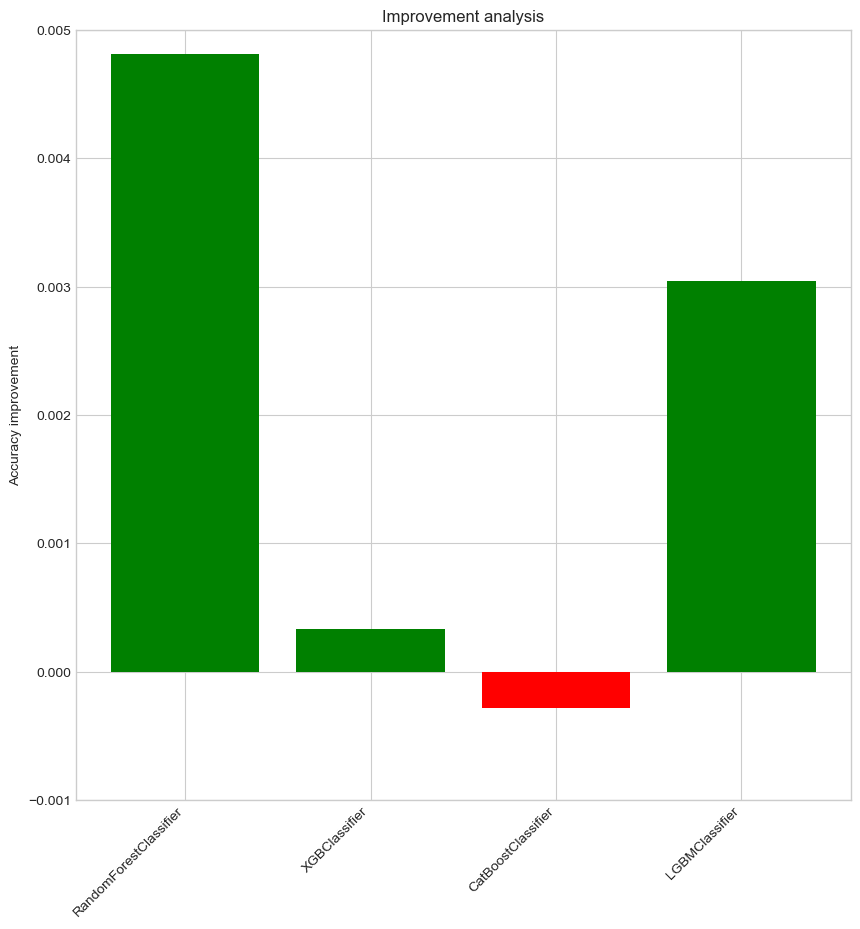

In [206]:
colors = ['green' if score > 0 else 'red' for score in difference]
fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(best_scores.keys(), difference, color=colors)

# Add labels and title
ax.set_ylabel('Accuracy improvement')
ax.set_title('Improvement analysis')
ax.set_ylim([-0.001, 0.005])
ax.set_xticklabels(best_scores.keys(), rotation=45, ha='right')
plt.savefig("improvement.png")

In [207]:
best_models

{'RandomForestClassifier': {'n_estimators': 200,
  'min_samples_split': 5,
  'min_samples_leaf': 4,
  'max_depth': None},
 'XGBClassifier': {'n_estimators': 300,
  'max_depth': 3,
  'learning_rate': 0.2,
  'colsample_bytree': 0.7},
 'CatBoostClassifier': {'random_strength': 2,
  'learning_rate': 0.1,
  'leaf_estimation_iterations': 1,
  'l2_leaf_reg': 5,
  'iterations': 400,
  'depth': 6,
  'border_count': 200,
  'bagging_temperature': 0.2},
 'LGBMClassifier': {'num_leaves': 31,
  'n_estimators': 200,
  'learning_rate': 0.2,
  'boosting_type': 'dart'}}

In [208]:
# Import the GridSearchfunction
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grids_GS = {
    'RandomForestClassifier': {
        'n_estimators': [190, 200, 210],
        'max_depth': [None],
        'min_samples_split': [4, 5, 6],
        'min_samples_leaf': [3, 4, 5]
    },
    'XGBClassifier': {
        'n_estimators': [290, 300, 310],
        'learning_rate': [0.2, 0.5, 1],
        'max_depth': [2, 3, 4],
        'colsample_bytree': [0.6, 0.7, 0.8]
    },
    'CatBoostClassifier': {
        'iterations': np.linspace(300, 500, 3, dtype=int),
        'learning_rate': [0.1, 0.2],
        'depth': [5, 6, 7],
        'l2_leaf_reg': [4, 5, 6],
        'bagging_temperature': [0.2, 0.3],
        'random_strength': [2, 3]
    },
    'LGBMClassifier': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [21, 31, 41],
        'boosting_type': ['dart']
    }
}

# Store the results
best_models_GS = {}
best_scores_GS = {}


# Iterate over the models and their parameter grids
for model_name, params in param_grids_GS.items():
    if model_name == 'RandomForestClassifier':
        model = RandomForestClassifier(random_state=42)
    elif model_name == 'XGBClassifier':
        model = XGBClassifier(random_state=42)
    elif model_name == 'CatBoostClassifier':
        model = CatBoostClassifier(silent=True, random_state=42)
    elif model_name == 'LGBMClassifier':
        model = LGBMClassifier(random_state=42)

    # Setup the Grid search
    grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
    
    # Fit the Grid search
    grid_search.fit(X_train, y_train)
    
    # Store the best parameters and best score
    best_models_GS[model_name] = grid_search.best_params_
    best_scores_GS[model_name] = grid_search.best_score_

# Print the best parameters and scores
for model_name in best_models_GS.keys():
    print(f"Best parameters for {model_name}: {best_models_GS[model_name]}")
    print(f"Best score for {model_name}: {best_scores_GS[model_name]}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1224
[LightGBM] [Info] Number of data points in the train set: 61214, number of used features: 24
[LightGBM] [Info] Start training from score -1.106863
[LightGBM] [Info] Start training from score -1.633477
[LightGBM] [Info] Start training from score -0.746218
Best parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 200}
Best score for RandomFo

In [209]:
# Improvement achieved compared to the random tuning
difference_search = [a - b for a, b in zip(best_scores_GS.values(), best_scores.values())]
difference_search

[0.00011437507715394979,
 0.0002776736825618187,
 0.0009475148874615869,
 0.0007187780772687224]

In [1]:
# Visualize
colors = ['green' if score > 0 else 'red' for score in difference_search]
fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(best_scores.keys(), difference_search, color=colors)

# Add labels and title
ax.set_ylabel('Accuracy improvement')
ax.set_title('Improvement analysis')
ax.set_ylim([-0.0002, 0.0014])
ax.set_xticklabels(best_scores.keys(), rotation=45, ha='right')
plt.savefig("grid_search_improvement.png")

NameError: name 'difference_search' is not defined

In [223]:
# Create X & y sets
X = df_tmp.drop('Target', axis=1)
y = df_tmp['Target']

# Map the y set
y = y.map(mapping)

# Apply SMOTETomek to balance the training data
smote_tomek = SMOTETomek(random_state=42)
X, y = smote_tomek.fit_resample(X, y)

# Train & test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Create the model
model = XGBClassifier(colsample_bytree=0.7,
                      learning_rate=0.2,
                      max_depth=3,
                      n_estimators=300)

# Fit the data
model.fit(X_train, y_train)

# Score the data
model.score(X_test, y_test)

0.8503008195556397

In [224]:
# Load the test data
#df_test = pd.read_csv("C:/Users/Digibrush/Downloads/CI/test.csv")
#df_test.head(10)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32
5,76523,1,17,4,9238,1,1,137.0,1,1,...,0,0,6,7,6,14.428571,0,11.1,0.6,2.02
6,76524,1,1,1,9773,1,1,126.0,1,1,...,0,0,6,6,6,13.333333,0,12.7,3.7,-1.70
7,76525,1,44,1,9003,1,39,150.0,1,19,...,0,0,6,6,6,12.666667,0,13.9,-0.3,0.79
8,76526,1,1,2,9773,1,1,131.0,1,38,...,0,0,6,8,5,11.000000,0,8.9,1.4,3.51
9,76527,1,1,1,9254,1,1,111.0,1,19,...,0,0,6,6,6,13.166667,0,11.1,0.6,2.02


In [225]:
# Check shape
#df_test.shape

(51012, 37)

In [226]:
# Preprocess the data to match
#df_test = df_test.drop(to_drop, axis=1)

In [227]:
# Check if worked
#df_test.shape

(51012, 24)

In [228]:
# Predict the values from the test set
#y_preds = model.predict(df_test)

In [237]:
import pickle

# Assuming 'model' is your trained model
with open('C:/Users/Digibrush/Downloads/CI/model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [238]:
with open('C:/Users/Digibrush/Downloads/CI/model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Check if the loaded model is the same as the original
print(loaded_model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)


In [229]:
# Create the sample submission
#data = {'id' : student_id,
        #'Target' : y_preds} 

#submission = pd.DataFrame(data)
#submission.head()

,id,Target
0,76518,0
1,76519,2
2,76520,2
3,76521,1
4,76522,1


In [230]:
# Check the predictions 
# y_preds

array([0, 2, 2, ..., 0, 0, 0], dtype=int64)

In [231]:
# Remap again to have strings instead of integers
#mapping_inv = {0 : 'Dropout',
              # 1 : 'Enrolled',
              # 2 : 'Graduate'}

# Transform the numpy array into a pandas Series
#y_preds = pd.Series(y_preds)

# Map the values
#y_preds = y_preds.map(mapping_inv)

# Check if it worked
#y_preds

0         Dropout
1        Graduate
2        Graduate
3        Enrolled
4        Enrolled
           ...   
51007     Dropout
51008     Dropout
51009     Dropout
51010     Dropout
51011     Dropout
Length: 51012, dtype: object

In [232]:
# Load the dataframe again, while preprocessing we deleted the id column
# df_test = pd.read_csv("C:/Users/Digibrush/Downloads/CI/test.csv")

# Create the id column
# student_id = df_test['id']
# student_id

0         76518
1         76519
2         76520
3         76521
4         76522
          ...  
51007    127525
51008    127526
51009    127527
51010    127528
51011    127529
Name: id, Length: 51012, dtype: int64

In [233]:
# Create the sample submission
# data = {'id' : student_id,
        # 'Target' : y_preds} 

# submission = pd.DataFrame(data)
# submission.head()

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Enrolled
4,76522,Enrolled


In [234]:
# Save the DataFrame as a csv file
# submission.to_csv("submission.csv", index=False)